# Разработка A/B-тестирования и анализ результатов


## Описание данных


Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


### Задачи: 
- рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

## Работа с историческими данными (EDA)

In [1]:
# импортируем библиотеку для работы с таблицами
import pandas as pd

# импортируем библиотеки для визуализаций
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# сохраняем в датафрейм "session_history" таблицу с историческими данными
session_history = pd.read_csv('/datasets/sessions_project_history.csv')

In [3]:
# выводим первые 5 строк
session_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


In [4]:
# выводим полную информацию о датафрейме
session_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            435924 non-null  object
 1   session_id         435924 non-null  object
 2   session_date       435924 non-null  object
 3   session_start_ts   435924 non-null  object
 4   install_date       435924 non-null  object
 5   session_number     435924 non-null  int64 
 6   registration_flag  435924 non-null  int64 
 7   page_counter       435924 non-null  int64 
 8   region             435924 non-null  object
 9   device             435924 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.3+ MB


In [5]:
# посмотрим уникальное количество сессий
session_history.session_id.nunique()

435924

Количество уникальных сессий совпадает с количеством строк в датафрейме. Это означает, что дубликатов в столбце `session_id` нет.

In [6]:
# считаем количество сессий для каждого пользователя
count_sessions_for_user_hist = session_history.groupby('user_id')['session_id'].count()

# сортируем полученную таблицу и сбрасываем индексы, чтобы получить датафрейм
count_sessions_for_user_hist = count_sessions_for_user_hist.sort_values(ascending=False).reset_index()

# сохраняем идентификатор пользователя с максимальным количеством сессий
top_user = count_sessions_for_user_hist.at[0, 'user_id']

In [7]:
# находим пользователя с максимальным количеством сессий
top_u = session_history.groupby('user_id')['session_id'].count().idxmax()
top_u

'10E0DEFC1ABDBBE0'

In [8]:
# выводим всю таблицу для пользователя с максимальным количеством заказов
session_history[session_history['user_id']==top_u]

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


In [9]:
# агрегируем данные с уникальным количеством всех пользователей
count_users_in_day = session_history.groupby('session_date')['user_id'].nunique()

# агрегируем данные с уникальным количеством зарегистрированных пользователей
count_reg_users_in_day = session_history[session_history['registration_flag']==1].groupby('session_date')['user_id'].nunique()

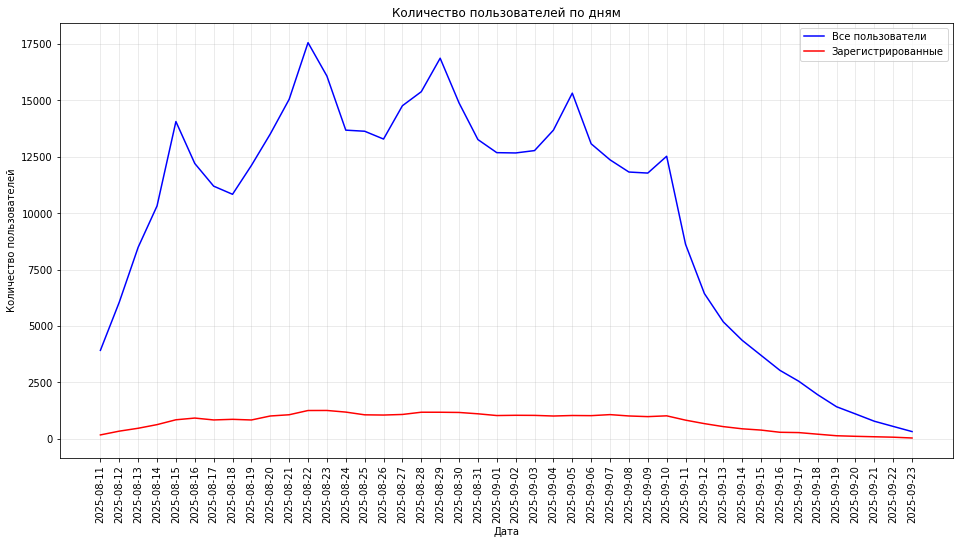

In [10]:
# строим график
plt.figure(figsize=(16, 8))
plt.plot(count_users_in_day, label='Все пользователи', color='blue')
plt.plot(count_reg_users_in_day, label='Зарегистрированные', color='red')

# настраиваем отображение
plt.title('Количество пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend() 
plt.grid(True, alpha=0.3) 
plt.xticks(rotation=90)

plt.show()

In [11]:
# сбрасываем индекс, чтобы сделать датафрейм
count_users_in_day = count_users_in_day.reset_index()

# проверим количество строк
count_users_in_day.shape

(44, 2)

In [12]:
# сбрасываем индекс, чтобы сделать датафрейм
count_reg_users_in_day = count_reg_users_in_day.reset_index()

# меняем название столбца
count_reg_users_in_day = count_reg_users_in_day.rename(columns={'user_id':'reg_user_id'})

# проверяем количество строк
count_reg_users_in_day.shape

(44, 2)

In [13]:
# объединяем полученные таблицы в один датафрейм
df_count_users = pd.merge(count_users_in_day, count_reg_users_in_day, on='session_date', how='inner')

# проверяем количество строк
df_count_users.shape

(44, 3)

Количество строк не изменилось, значит объединение прошло верно.

In [14]:
# посмотрим на полученную таблицу
df_count_users.head()

,session_date,user_id,reg_user_id
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840


In [15]:
# создаем новый столбец, в котором считаем долю зарегистрированных пользователей
df_count_users['share_reg_users'] = round((df_count_users['reg_user_id'] / df_count_users['user_id'] * 100), 2)

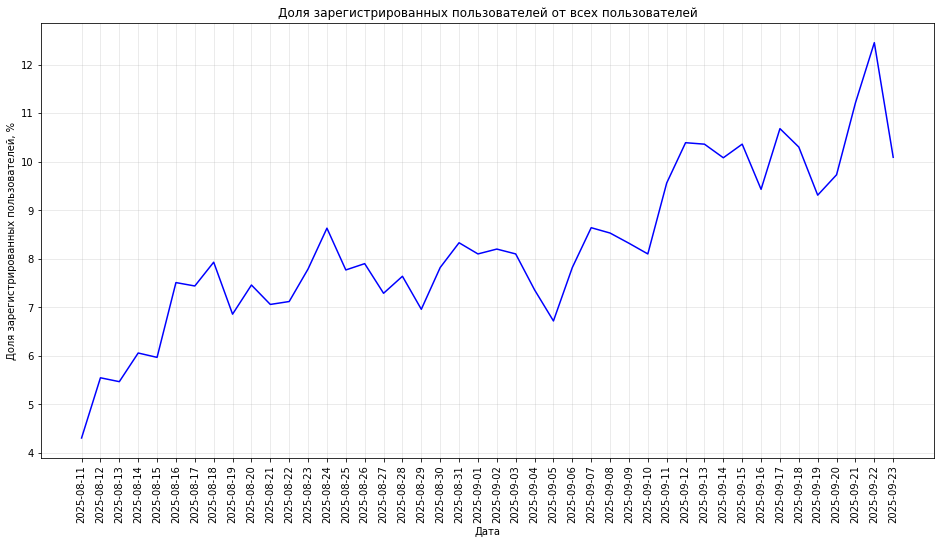

In [16]:
# строим график
plt.figure(figsize=(16, 8))
plt.plot(df_count_users['session_date'], df_count_users['share_reg_users'], color='blue')

# настраиваем отображение
plt.title('Доля зарегистрированных пользователей от всех пользователей')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей, %')
plt.grid(True, alpha=0.3) 
plt.xticks(rotation=90)

plt.show()

In [17]:
# находим количество сессий для каждого числа просмотренных страниц
count_sessions = session_history.groupby('page_counter')['session_id'].count()

# сбрасываем индекс, чтобы получить датафрейм
count_sessions = count_sessions.reset_index()

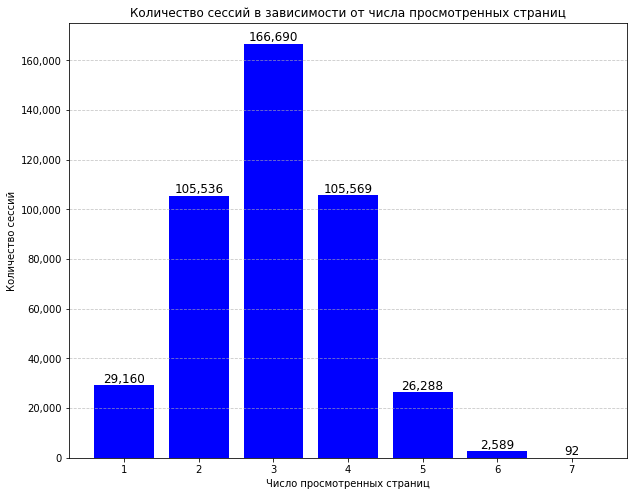

In [18]:
# строим график
plt.figure(figsize=(10, 8))
bars = plt.bar(count_sessions['page_counter'], count_sessions['session_id'], color='blue')

# настраиваем отображение
plt.title('Количество сессий в зависимости от числа просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')

# форматирование оси Y с разделителями тысяч
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 1,                         
        f'{height:,}',                        
        ha='center',                       
        va='bottom',               
        fontsize=12
    )

plt.show()

In [19]:
# добавляем столбец "good_session" со значением "1", если просмотренных страниц больше 4 
# и значением "0", если просмотренных страниц меньше
session_history['good_session'] = (session_history['page_counter'] >= 4).astype(int)

In [20]:
# находим долю успешных сессий в день
share_good_sessions = session_history.groupby('session_date')['good_session'].mean().reset_index()

# переводим значения в проценты
share_good_sessions['good_session'] = share_good_sessions['good_session'] * 100

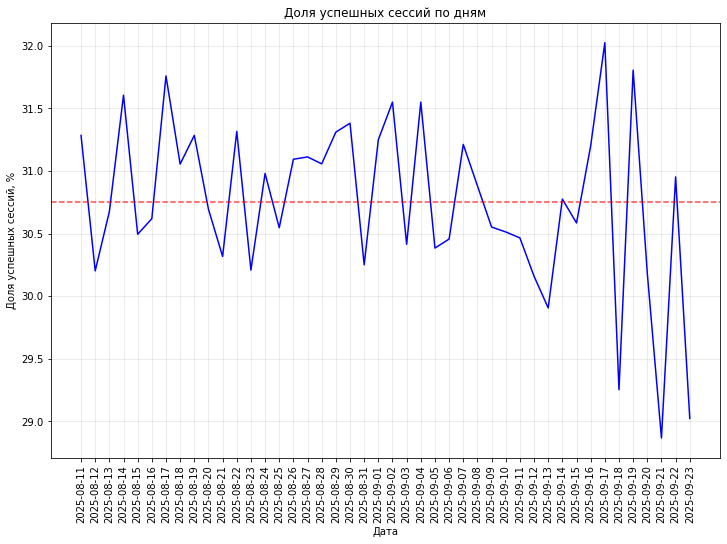

In [21]:
# строим график
plt.figure(figsize=(12, 8))
plt.plot(share_good_sessions['session_date'], share_good_sessions['good_session'], color='blue')

# настраиваем отображение
plt.title('Доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий, %')
plt.grid(True, alpha=0.3) 
plt.xticks(rotation=90)

# Добавляем горизонтальную линию среднего
mean_value = share_good_sessions['good_session'].mean()
plt.axhline(mean_value, color='red', linestyle='--', alpha=0.7)

plt.show()

**Промежуточный вывод**

В датафрейме `session_history` все данные соответствуют своему описанию, пропуски отсутствуют. Наблюдаемые данные находятся в интервале 11.08.2025 - 23.09.2025.

Зарегистрированные пользователи составляют лишь малую часть от всех пользователей (около 10%). К концу наблюдаемого периода количество пользователей резко сократилось. Максимальное значение в 17500 уникальных пользователей было 22.08.2025. В последний наблюдаемый день 23.09.2025, уникальных пользователей было меньше тысячи. При этом количество зарегистрированных пользователей в день по отношению ко всем пользователям за день постепенно увеличивалось с 4% до 10%.

Чаще всего пользователи просматривают 3 страницы за одну сессию. Если рассматривать долю 4 и более проссмотренных страниц за сессию в течении дня, этот показатель будет находиться в диапазоне от 30% до 32% до 18.09.2025, после образуется нисходящий тренд и этот показатель опускается до 29%, что может говорить о неудовлетворенности алгоритмом рекомендаций.

##  Подготовка к тесту


###  Расчёт размера выборки

In [22]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


In [23]:
# проверим сколько уникальных пользователей воспользовались приложением по историческим данным
session_history['user_id'].nunique()

134039

Данных вполне должно хватить, чтобы набрать необходимый размер групп.

### Расчёт длительности A/B-теста

In [24]:
from math import ceil

# Среднее количество уникальных пользователей приложения в день по историческим данным
avg_daily_users = df_count_users['user_id'].mean().round()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size * 2 / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.0 пользователей в день составит 4 дней


**Промежуточный вывод**

Для выявления MDE=3% при уровне значимости 0.05 и мощности 0.8 потребуется набрать две выборки по 17441 уникальных пользователей, а в общем 34882 уникальных пользователей. Так как за один день пользуются приложением в среднем 9907 уникальных пользователей, то выборки можно набрать за 4 дня. Может понадобиться больше времени, потому что каждый день могут заходить в приложение одни и те же пользователи.

## Мониторинг А/В-теста

### Проверка распределения пользователей

In [25]:
# загружаем данные за первый день эксперимента
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

In [26]:
# расчитываем количество уникальных пользователей в каждой группе
count_a = sessions_test_part[sessions_test_part['test_group']=='A']['user_id'].nunique()
count_b = sessions_test_part[sessions_test_part['test_group']=='B']['user_id'].nunique()

print(f'Количество уникальных пользователей в группе А: {count_a}')
print(f'Количество уникальных пользователей в группе B: {count_b}')

Количество уникальных пользователей в группе А: 1477
Количество уникальных пользователей в группе B: 1466


In [27]:
# расчитываем процентную разницу между количеством пользователей в группах
percent_diff = round((count_a - count_b) / count_a * 100, 1)

print(f'Процентная разница между количеством пользователей в группах: {percent_diff}%')

Процентная разница между количеством пользователей в группах: 0.7%


In [28]:
# создаем необходимые данные для визуализации
groups = ['A', 'B']
counts = [count_a, count_b]

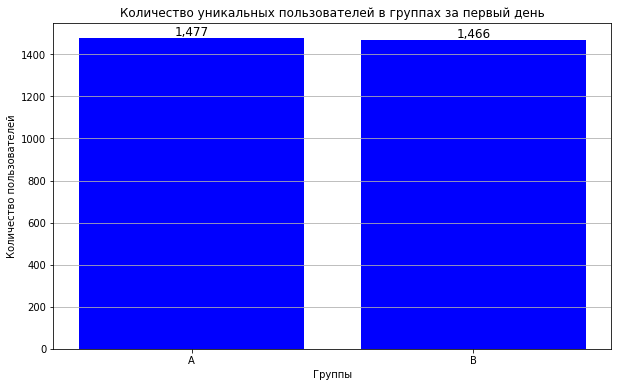

In [29]:
# строим график
plt.figure(figsize=(10, 6))
bars1 = plt.bar(groups, counts, color='blue')

# настраиваем отображение
plt.title('Количество уникальных пользователей в группах за первый день')
plt.xlabel('Группы')
plt.ylabel('Количество пользователей')
plt.grid(axis='y')

# добавляем значения на столбцы
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 1,                         
        f'{height:,}',                        
        ha='center',                       
        va='bottom',               
        fontsize=12
    )

plt.show()

### Проверка пересечений пользователей

In [30]:
# получаем списки пользователей для каждой группы
group_a = sessions_test_part[sessions_test_part['test_group']=='A']['user_id']
group_b = sessions_test_part[sessions_test_part['test_group']=='B']['user_id']

# преобразуем списки в множества и получаем их пересечение
intersection = list(set(group_a) & set(group_b))

print('Количество пересекающихся пользователей в группах:', len(intersection))

Количество пересекающихся пользователей в группах: 0


In [31]:
# проверяем есть ли пользователи, которые попали сразу в обе группы
sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1')

,test_group
user_id,


### Равномерность разделения пользователей по устройствам

In [32]:
# создаем датафрейм с агрегированными данными по группам и устройствам
group_device = sessions_test_part.groupby(['test_group', 'device'])['user_id'].nunique().reset_index(name='count')

In [33]:
# добавляем столбец с долей каждого устройства в зависимости от группы
group_device['share'] = 100 * group_device['count'] / group_device.groupby('test_group')['count'].transform('sum')
group_device

,test_group,device,count,share
0,A,Android,656,44.414353
1,A,Mac,156,10.561950
2,A,PC,369,24.983074
3,A,iPhone,296,20.040623
4,B,Android,668,45.566166
5,B,Mac,148,10.095498
6,B,PC,381,25.989086
7,B,iPhone,269,18.349250


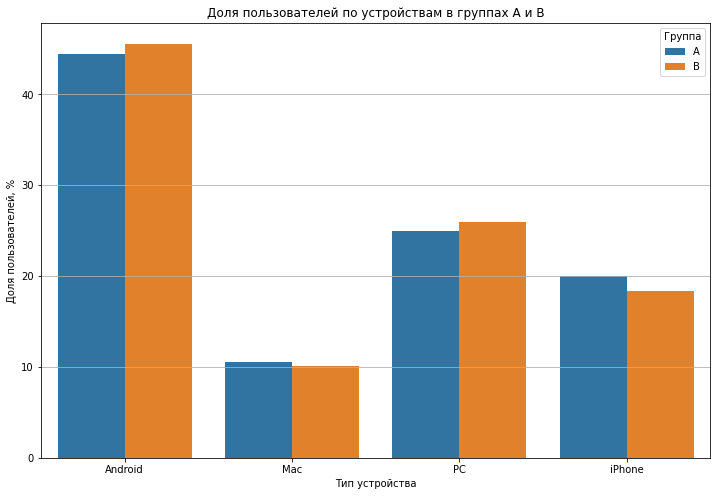

In [34]:
# строим график
plt.figure(figsize=(12, 8))
sns.barplot(
    data=group_device,
    x='device',
    y='share',
    hue='test_group'
)

# настраиваем отображение
plt.title('Доля пользователей по устройствам в группах A и B')
plt.xlabel('Тип устройства')
plt.ylabel('Доля пользователей, %')
plt.legend(title='Группа')
plt.grid(axis='y')

plt.show()

### Равномерность распределения пользователей по регионам

In [35]:
# создаем датафрейм с агрегированными данными по группам и регионам
group_region = sessions_test_part.groupby(['test_group', 'region'])['user_id'].nunique().reset_index(name='count')

In [36]:
# добавляем столбец с долей каждого региона в зависимости от группы
group_region['share'] = 100 * group_region['count'] / group_region.groupby('test_group')['count'].transform('sum')
group_region

,test_group,region,count,share
0,A,CIS,644,43.601896
1,A,EU,224,15.165877
2,A,MENA,609,41.232227
3,B,CIS,645,43.997271
4,B,EU,217,14.802183
5,B,MENA,604,41.200546


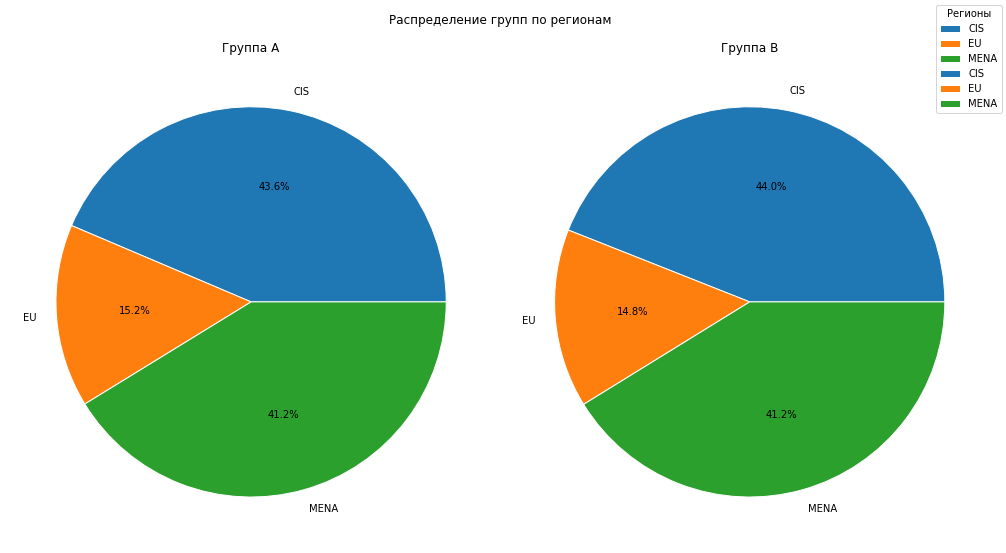

In [37]:
# создаем фигуру с двумя subplots
fig, (a, b) = plt.subplots(1, 2, figsize=(14, 8))

# диаграмма для группы А
a.pie(
    group_region[group_region['test_group']=='A']['share'],
    labels=group_region[group_region['test_group']=='A']['region'],
    autopct='%.1f%%',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
a.set_title('Группа А')

# диаграмма для группы В
b.pie(
    group_region[group_region['test_group']=='B']['share'],
    labels=group_region[group_region['test_group']=='B']['region'],
    autopct='%.1f%%',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
b.set_title('Группа В')

# общая легенда
fig.legend(
    group_region['region'],
    title='Регионы')

# Общий заголовок
plt.suptitle('Распределение групп по регионам')

plt.tight_layout()
plt.show()

### Вывод после проверки A/B-теста

**Промежуточный вывод**

Итоги сравнения групп:
- Различие в количестве пользователей между группами несущественно. В группе "А" немного больше пользователей, разница составляет менее 1%.
- Группы являются независимыми. Проверка показала, что пересечение пользователей между тестовой и контрольной группами отсутствует.
- Распределение пользователей в зависимости от устройства в наблюдаемых группах практически идентично. Распределение пользователей по регионам, также имеет схожий вид между группами. Можно сказать, что различий в распределениях нет.

В целом можно сказать, что А/В-тест проходит корректно и явных нарушений на начальном этапе не наблюдается.

## Проверка результатов A/B-теста

### Получение результатов теста и подсчёт основной метрики

In [38]:
# загружаем данные за весь период эксперимента
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

In [39]:
# создаем дополнительный столбец "good_session" со значением "1", если просмотренных страниц больше 4 
# и значением "0", если просмотренных страниц меньше
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

### Проверка корректности результатов теста

In [40]:
# в каждой выборке группируем данные по дням и считаем количество уникальных сессий
count_sessions_a = sessions_test[sessions_test['test_group']=='A'].groupby('session_date')['session_id'].nunique().reset_index()
count_sessions_b = sessions_test[sessions_test['test_group']=='B'].groupby('session_date')['session_id'].nunique().reset_index()

Сравним выборки с помощью линейных графиков.

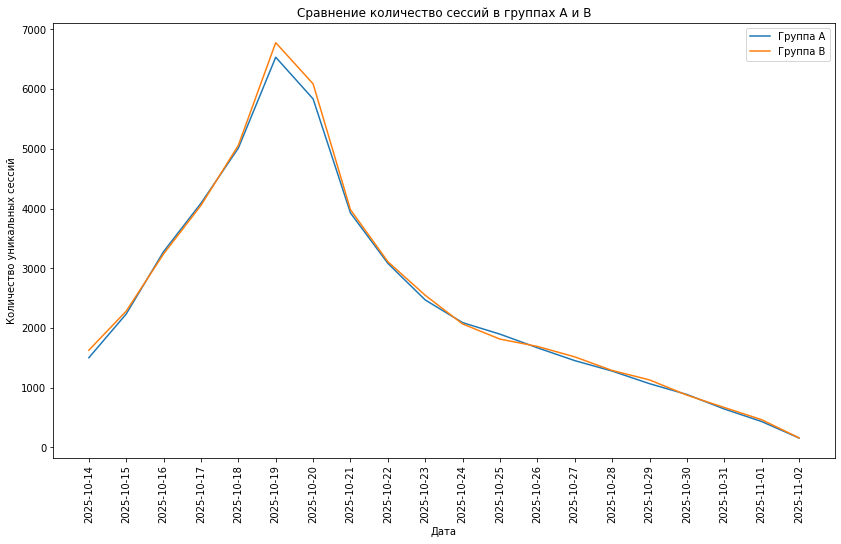

In [41]:
# создаем фигуру для графиков
plt.figure(figsize=(14, 8))

# создаем график для группы А
plt.plot(count_sessions_a['session_date'],
         count_sessions_a['session_id'], 
         label ='Группа А'
        )
# создаем график для группы В
plt.plot(count_sessions_b['session_date'],
         count_sessions_b['session_id'], 
         label ='Группа B'
        )
# настраиваем отображение
plt.xlabel("Дата")
plt.ylabel("Количество уникальных сессий")
plt.legend()
plt.title('Сравнение количество сессий в группах А и В')
plt.xticks(rotation=90)

plt.show()

По графику видно, что выборки идентичны, значит дисперсии будут тоже схожие. Для сравнения средних двух выборок применем t-тест с нулевой гипотезой H0: μa = μb и альтернативной гипотезой H1: μa ≠ μb.

In [42]:
# импортируем функцию для проведения t-теста 
from scipy.stats import ttest_ind

# устанавливаем уровень значимости
alpha = 0.05

# проводим двухсторонний t-тест
stat_ttest, p_value = ttest_ind(
    count_sessions_a['session_id'], 
    count_sessions_b['session_id'], 
    alternative='two-sided'
)

# составляем условия для расчитанного значения и интерпритируем его
if p_value > alpha:
    print(f'p-value теста Стьюдента = {round(p_value, 2)}')
    print('Количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы.')
else:
    print(f'p-value теста Стьюдента = {round(p_value, 2)}')
    print('Количество уникальных дневных сессий в двух выборках имеют статистически значимые различия.')

p-value теста Стьюдента = 0.94
Количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы.


### Сравнение доли успешных сессий

In [43]:
# считаем долю успешных сессий для группы А
share_a = sessions_test[sessions_test['test_group']=='A']['good_session'].mean()

In [44]:
# считаем долю успешных сессий для группы В
share_b = sessions_test[sessions_test['test_group']=='B']['good_session'].mean()

In [45]:
# считаем разницу между полученными долями в группах
diff = (share_a  - share_b) * 100

print(f'Разница между долями успешных сессий в наблюдаемых группах составляет {round(diff, 1)}%')

Разница между долями успешных сессий в наблюдаемых группах составляет -1.1%


Отрицательное значение говорит о том, что вероятность успешных сессий в группе "В" выше. Реальную значимость этого показателя можно выявить с помощью статистического теста.

### Насколько статистически значимо изменение ключевой метрики

Сначало убедимся, что у нас достаточное количество данных.

In [46]:
# расчитываем размеры выборок для каждой группы
n_a = sessions_test[sessions_test['test_group']=='A']['good_session'].count()
n_b = sessions_test[sessions_test['test_group']=='B']['good_session'].count()

In [47]:
# расчитываем количество успешных сессий для каждой группы
m_a = sessions_test[sessions_test['test_group']=='A']['good_session'].sum()
m_b = sessions_test[sessions_test['test_group']=='B']['good_session'].sum()

In [48]:
# задаем условие для проверки о необходимом количестве данных
if (share_a*n_a > 10)and((1-share_a)*n_a > 10)and(share_b*n_b > 10)and((1-share_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


Проведем z-тест с альтернативной гипотезой H1: μa < μb.

In [49]:
# импортируем функцию для проведения z-теста
from statsmodels.stats.proportion import proportions_ztest

# устанавливаем уровень значимости
alpha = 0.05

# проводим z-тест
stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller'
)

# составляем условие для расчитанного значения и интерпритируем его
if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Количество успешных сессий в наблюдаемых группах не имеют статистически значимых различий.')
else:
    print(f'pvalue={p_value_ztest}')
    print('Нулевая гипотеза не находит подтверждения!')
    print('Количество успешных сессий в группе А меньше, чем в группе В.')

pvalue=0.0001574739988036123
Нулевая гипотеза не находит подтверждения!
Количество успешных сессий в группе А меньше, чем в группе В.


### Вывод по результатам A/B-эксперимента

В эксперименте было задействовано 15163 уникальных пользователя в группе А и 15416 уникальных пользователя в группе В. А/В-тест длился в течении 20 дней. Предварительная проверка показала, что А/В-тест проходил корректно и без явных нарушений. Нулевая гипотеза H0: μa = μb, альтернативная гипотеза H1: μa < μb.

Уровень значимости был установлен ɑ = 0.05, значение расчитаное в А/В-тесте p-value = 0.000157, что говорит о подтверждении альтернативной гипотезы.

Статистический тест показал, что в тестовой группе был зафиксирован рост успешных сессий по сравнению с контрольной группой. Значит внедрение нового алгоритма рекомендаций было успешным.

Эксперимент показал, что новый алгоритм можно внедрять в приложение.